In [1]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_full.csv', 
                     dtype=None, 
                     delimiter=',', 
                     skip_header=1) 
X = iris[:, :4]
y = iris[:, 4]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [2]:
indices = np.random.permutation(X.shape[0])
X = X[indices]
y = y[indices]

print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [3]:
# split data into training and testing data

X_train = X[:80]
y_train = y[:80]

X_val = X[80:]
y_val = y[80:]

print(y_train)
print(y_val)

[0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0.]
[1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.]


In [4]:
X_train.shape

(80, 5)

In [13]:
type(y_train)

numpy.ndarray

In [6]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def loss_function(y_hat, y):
    return (-y*np.log(y_hat) - (1-y)*np.log(1-y_hat)).mean()

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)) / y.size

In [8]:
# training
lr=0.01
num_iter=1000

theta = np.random.normal(0.0, 0.1, (5,))  # mean, standard deviation, and shape
losses_train = []
losses_val   = []

accs_train = []
accs_val   = []

for i in range(num_iter):
    # predict z
    y_hat = predict(X_train, theta)
    
    
    # compute loss
    loss = loss_function(y_hat, y_train)
    
    # compute mean of gradient
    gradient = compute_gradient(X_train, y_hat, y_train)
    
    # update
    theta -= lr*gradient     
    
    
    
    # ========== for debug ==========
    # loss for training
    losses_train.append(loss)
    
    # loss for validation
    y_hat = predict(X_val, theta)
    loss = loss_function(y_hat, y_val)
    losses_val.append(loss)

    
    # accuracy for training
    preds = predict(X_train, theta).round()
    acc = (preds == y_train).mean()
    accs_train.append(acc) 
    
    # accuracy for validation
    preds = predict(X_val, theta).round()
    acc = (preds == y_val).mean()
    accs_val.append(acc)

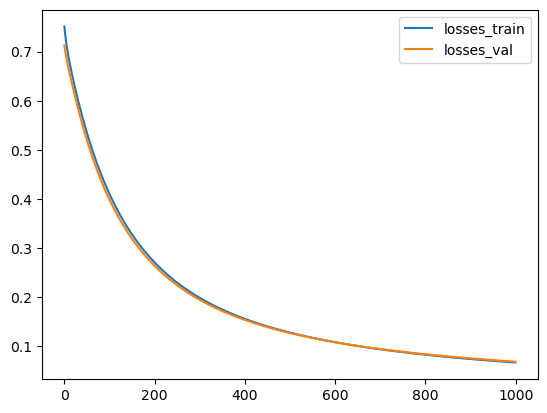

In [9]:
# show figures
plt.plot(losses_train, label='losses_train')
plt.plot(losses_val, label='losses_val')
plt.legend()
plt.show()

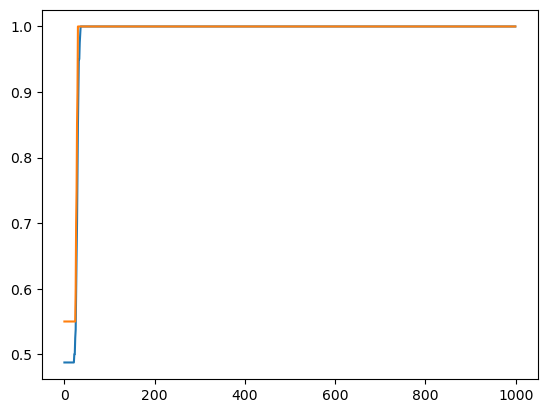

In [10]:
plt.plot(accs_train)
plt.plot(accs_val)
plt.show()

In [11]:
preds = predict(X_val, theta).round()
print(preds)
print(y_val)

[1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.]
[1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.]
